# Лабораторна робота 5

## Винонав студент групи АнД-41
## Шатохін Андрій
## Варіант 13


## Завдання

### Частина 1,2

1. Виконати вирішення задачs класифікації для 3 класів з набору даних [food101](https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip) з використанням різних моделей нейронних мереж:<br>
1.1 CNN модель з лабораторної роботи 4<br>
1.2 [Resnet модель](https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5)<br>
1.3 [Efficientnet модель](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1) (моделі 1.1-1.3 з використанням оптимізатора Adam)<br>
1.4 (1.5) Моделі 1.2,1.3 з використанням оптимізатора SGD.<br>
1.6 (1.7) Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)<br>


2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за [списком групи](https://docs.google.com/spreadsheets/d/1k6rqaOpWJkmzRzaXXWLZHYwsY4hskfiDkp91yw2BxfQ/edit#gid=0)
3. Порівняти результати моделювання із використанням TensorBoard
4. Графік(и) порівняння результатів завантажити у форматі .svg та  вставити у підсумковий файл поряд із та відповідними висновками
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab5).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
train_path = '../lab_4/data/train'
test_path = '../lab_4/data/test'

In [4]:
IMAGE_SIZE = (224, 224)

In [5]:
img_classes = os.listdir(train_path)
img_classes

['croque_madame', 'ice_cream', 'seaweed_salad']

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
seed = 42

# Set the seed
np.random.seed(seed)
tf.random.set_seed(seed)

### Read data

In [35]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_data_augmented = train_datagen_augmented.flow_from_directory(test_path,
                                                                   target_size=IMAGE_SIZE,
                                                                   batch_size=32,
                                                                   class_mode='categorical')

test_data = test_datagen.flow_from_directory(train_path,
                                             target_size=IMAGE_SIZE,
                                             batch_size=32,
                                             class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [10]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [11]:
import tensorflow_hub as hub
import datetime

In [12]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

### Compare NN 

#### CNN (optimizer Adam) 

In [14]:
tf.random.set_seed(seed)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,
                          activation='softmax')
])


In [20]:
tf.random.set_seed(seed)

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data_augmented,
                            epochs=40,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data=test_data,
                            validation_steps=len(test_data), 
                            callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="cnn_model")])

Saving TensorBoard log files to: tensorflow_hub/cnn_model/20211117-223307
Epoch 1/40
24/24 [==============================] - 17s 520ms/step - loss: 1.0713 - accuracy: 0.4147 - val_loss: 0.8027 - val_accuracy: 0.5822
Epoch 2/40
24/24 [==============================] - 12s 503ms/step - loss: 0.7875 - accuracy: 0.6200 - val_loss: 0.7818 - val_accuracy: 0.6533
Epoch 3/40
24/24 [==============================] - 12s 504ms/step - loss: 0.7009 - accuracy: 0.6573 - val_loss: 0.6637 - val_accuracy: 0.6889
Epoch 4/40
24/24 [==============================] - 12s 490ms/step - loss: 0.7310 - accuracy: 0.6387 - val_loss: 0.8038 - val_accuracy: 0.6800
Epoch 5/40
24/24 [==============================] - 13s 517ms/step - loss: 0.6917 - accuracy: 0.6693 - val_loss: 0.7003 - val_accuracy: 0.7022
Epoch 6/40
24/24 [==============================] - 12s 489ms/step - loss: 0.6433 - accuracy: 0.6973 - val_loss: 0.6848 - val_accuracy: 0.7111
Epoch 7/40
24/24 [==============================] - 13s 539ms/step -

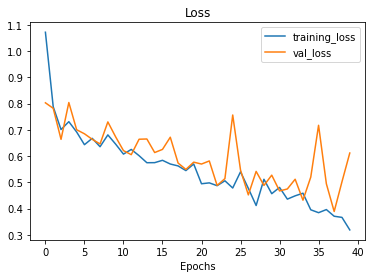

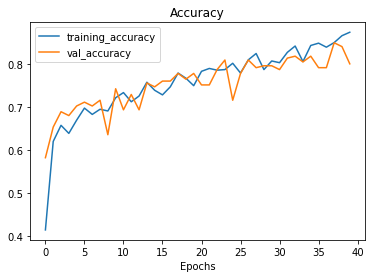

In [21]:
plot_loss_curves(cnn_history)

In [22]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

#### Resnet (optimizer Adam)

In [13]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [18]:
def create_model(model_url, num_classes=10, input_shape=None):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False,
                       input_shape=input_shape),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

In [30]:
resnet_model = create_model(resnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

In [32]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50/20211117-224907
Epoch 1/10
24/24 [==============================] - 16s 615ms/step - loss: 0.2008 - accuracy: 0.9307 - val_loss: 0.1868 - val_accuracy: 0.9289
Epoch 2/10
24/24 [==============================] - 14s 548ms/step - loss: 0.1435 - accuracy: 0.9520 - val_loss: 0.1763 - val_accuracy: 0.9289
Epoch 3/10
24/24 [==============================] - 14s 553ms/step - loss: 0.1220 - accuracy: 0.9613 - val_loss: 0.1683 - val_accuracy: 0.9333
Epoch 4/10
24/24 [==============================] - 13s 545ms/step - loss: 0.0941 - accuracy: 0.9747 - val_loss: 0.1641 - val_accuracy: 0.9289
Epoch 5/10
24/24 [==============================] - 13s 539ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.1748 - val_accuracy: 0.9200
Epoch 6/10
24/24 [==============================] - 13s 540ms/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.1561 - val_accuracy: 0.9378
Epoch 7/10
24/24 [==============================] - 13s 538ms/ste

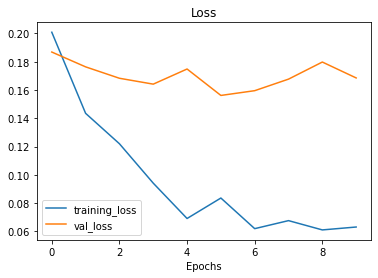

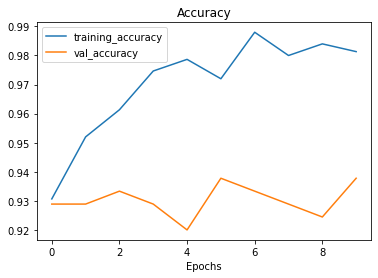

In [33]:
plot_loss_curves(resnet_history)

In [34]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


#### EfficientNet (optimizer Adam) 

In [19]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [36]:
efficientnet_model = create_model(efficientnet_url, num_classes=len(img_classes), input_shape=IMAGE_SIZE+(3,))

In [37]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

efficientnet_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=10,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet/20211117-230020
Epoch 1/10
24/24 [==============================] - 25s 695ms/step - loss: 0.6581 - accuracy: 0.7800 - val_loss: 0.3344 - val_accuracy: 0.9289
Epoch 2/10
24/24 [==============================] - 13s 517ms/step - loss: 0.2539 - accuracy: 0.9440 - val_loss: 0.1953 - val_accuracy: 0.9600
Epoch 3/10
24/24 [==============================] - 13s 548ms/step - loss: 0.1638 - accuracy: 0.9747 - val_loss: 0.1523 - val_accuracy: 0.9644
Epoch 4/10
24/24 [==============================] - 13s 513ms/step - loss: 0.1341 - accuracy: 0.9760 - val_loss: 0.1297 - val_accuracy: 0.9644
Epoch 5/10
24/24 [==============================] - 14s 554ms/step - loss: 0.1059 - accuracy: 0.9773 - val_loss: 0.1166 - val_accuracy: 0.9733
Epoch 6/10
24/24 [==============================] - 13s 543ms/step - loss: 0.0870 - accuracy: 0.9867 - val_loss: 0.1073 - val_accuracy: 0.9733
Epoch 7/10
24/24 [==============================] - 13s 523ms/ste

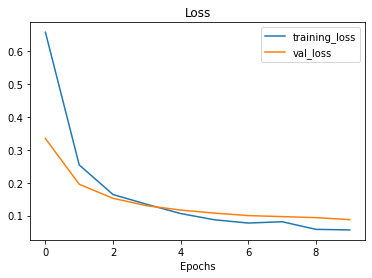

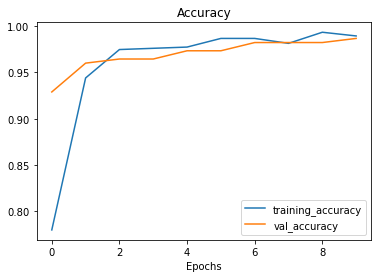

In [38]:
plot_loss_curves(efficientnet_history)

In [39]:
efficientnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              4049564   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3843      
Total params: 4,053,407
Trainable params: 3,843
Non-trainable params: 4,049,564
_________________________________________________________________


#### Resnet (optimizer SGD)

In [44]:
tf.random.set_seed(seed)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=['accuracy'])

resnet_sgd_history = resnet_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_sgd")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50_sgd/20211117-230812
Epoch 1/5
24/24 [==============================] - 16s 596ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.1644 - val_accuracy: 0.9333
Epoch 2/5
24/24 [==============================] - 13s 531ms/step - loss: 0.0454 - accuracy: 0.9880 - val_loss: 0.1652 - val_accuracy: 0.9333
Epoch 3/5
24/24 [==============================] - 15s 613ms/step - loss: 0.0394 - accuracy: 0.9920 - val_loss: 0.1668 - val_accuracy: 0.9333
Epoch 4/5
24/24 [==============================] - 14s 585ms/step - loss: 0.0421 - accuracy: 0.9893 - val_loss: 0.1682 - val_accuracy: 0.9289
Epoch 5/5
24/24 [==============================] - 14s 552ms/step - loss: 0.0416 - accuracy: 0.9907 - val_loss: 0.1692 - val_accuracy: 0.9289


#### EfficientNet (optimizer SGD) 

In [46]:
tf.random.set_seed(seed)

# Compile
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.SGD(),
                           metrics=['accuracy'])

efficientnet_sgd_history = efficientnet_model.fit(train_data_augmented,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_augmented),
                                              validation_data=test_data,
                                              validation_steps=len(test_data), 
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     experiment_name="efficientnet_sgd")])

Saving TensorBoard log files to: tensorflow_hub/efficientnet_sgd/20211117-231016
Epoch 1/5
24/24 [==============================] - 18s 658ms/step - loss: 0.0510 - accuracy: 0.9893 - val_loss: 0.0846 - val_accuracy: 0.9911
Epoch 2/5
24/24 [==============================] - 14s 554ms/step - loss: 0.0484 - accuracy: 0.9907 - val_loss: 0.0851 - val_accuracy: 0.9867
Epoch 3/5
24/24 [==============================] - 13s 533ms/step - loss: 0.0476 - accuracy: 0.9933 - val_loss: 0.0846 - val_accuracy: 0.9867
Epoch 4/5
24/24 [==============================] - 13s 538ms/step - loss: 0.0546 - accuracy: 0.9880 - val_loss: 0.0847 - val_accuracy: 0.9867
Epoch 5/5
24/24 [==============================] - 13s 540ms/step - loss: 0.0467 - accuracy: 0.9880 - val_loss: 0.0841 - val_accuracy: 0.9867


In [49]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [51]:
# Clear any logs from previous runs
# rm -rf ./tensorflow_hub/

In [50]:
%tensorboard --logdir ./tensorflow_hub/

In [10]:
from IPython.display import SVG

In [11]:
svg_image_dir = './graphs'

In [58]:
svg_plots = ['epoch_accuracy.svg', 'epoch_loss.svg', 'evaluation_loss_vs_iterations.svg', 'evaluation_accuracy_vs_iterations.svg']

#### Plots 

##### Epoch accuracy 

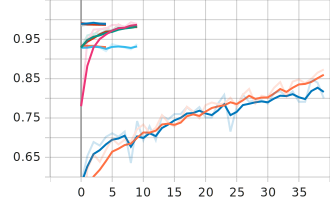

In [12]:
SVG(os.path.join(svg_image_dir, 'epoch_accuracy.svg'))

##### Epoch loss 

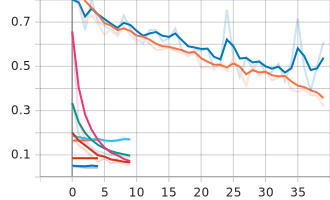

In [13]:
SVG(os.path.join(svg_image_dir, 'epoch_loss.svg'))

##### Evaluation loss vs iterations 

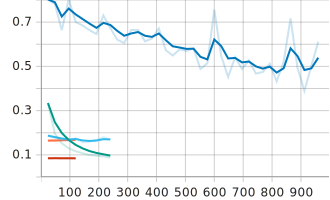

In [14]:
SVG(os.path.join(svg_image_dir, 'evaluation_loss_vs_iterations.svg'))

##### Evaluation accuracy vs iterations 

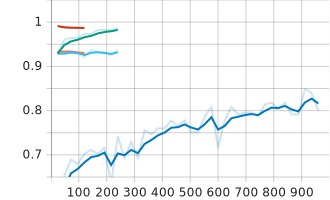

In [15]:
SVG(os.path.join(svg_image_dir, 'evaluation_accuracy_vs_iterations.svg'))

1.6 (1.7) Моделі 1.2,1.3 отримані за допомогою tf.keras.applications та треновані з використанням fine-tuning (останні 10 шарів)

In [19]:
def model_trainable_layers(model):
    for layer_number, layer in enumerate(model.layers):
        print(layer_number, layer.name, layer.trainable, len(layer.trainable_variables))

#### Resnet + fine-tuning

In [27]:
resnet_fine_tuning_model = tf.keras.applications.ResNet50V2(include_top=False,
                                                            weights='imagenet',
                                                            input_shape=IMAGE_SIZE + (3,),
                                                            pooling='max',
                                                            classes=len(img_classes),
                                                            classifier_activation='softmax',
)

In [28]:
# Fine-tuning last 10 layers
resnet_fine_tuning_model.trainable = False

for layer in resnet_fine_tuning_model.layers[-10:]:
    layer.trainable = True

In [29]:
model_trainable_layers(resnet_fine_tuning_model)

0 input_2 False 0
1 conv1_pad False 0
2 conv1_conv False 0
3 pool1_pad False 0
4 pool1_pool False 0
5 conv2_block1_preact_bn False 0
6 conv2_block1_preact_relu False 0
7 conv2_block1_1_conv False 0
8 conv2_block1_1_bn False 0
9 conv2_block1_1_relu False 0
10 conv2_block1_2_pad False 0
11 conv2_block1_2_conv False 0
12 conv2_block1_2_bn False 0
13 conv2_block1_2_relu False 0
14 conv2_block1_0_conv False 0
15 conv2_block1_3_conv False 0
16 conv2_block1_out False 0
17 conv2_block2_preact_bn False 0
18 conv2_block2_preact_relu False 0
19 conv2_block2_1_conv False 0
20 conv2_block2_1_bn False 0
21 conv2_block2_1_relu False 0
22 conv2_block2_2_pad False 0
23 conv2_block2_2_conv False 0
24 conv2_block2_2_bn False 0
25 conv2_block2_2_relu False 0
26 conv2_block2_3_conv False 0
27 conv2_block2_out False 0
28 conv2_block3_preact_bn False 0
29 conv2_block3_preact_relu False 0
30 conv2_block3_1_conv False 0
31 conv2_block3_1_bn False 0
32 conv2_block3_1_relu False 0
33 conv2_block3_2_pad False 0
3

In [30]:
tf.random.set_seed(seed)

# Compile
resnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

resnet_fine_tuning_model_history = resnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="resnet_v2_50_fine_tuning")])

Saving TensorBoard log files to: tensorflow_hub/resnet_v2_50_fine_tuning/20211125-091157
Epoch 1/5


InvalidArgumentError:  required broadcastable shapes
	 [[node categorical_crossentropy/mul
 (defined at D:\anaconda3\lib\site-packages\keras\backend.py:5028)
]] [Op:__inference_train_function_25509]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/mul:
In[0] IteratorGetNext (defined at D:\anaconda3\lib\site-packages\keras\engine\training.py:866)	
In[1] categorical_crossentropy/Log:

Operation defined at: (most recent call last)
>>>   File "D:\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "D:\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-30-463c568c320b>", line 8, in <module>
>>>     resnet_fine_tuning_model_history = resnet_fine_tuning_model.fit(train_data_augmented,
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\backend.py", line 5028, in categorical_crossentropy
>>>     return -tf.reduce_sum(target * tf.math.log(output), axis)
>>> 

#### EfficientNet + Fine-tuning 

In [37]:
efficientnet_fine_tuning_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                                      weights='imagenet',
                                                                      input_shape=IMAGE_SIZE + (3,),
                                                                      pooling='max',
                                                                      classes=len(img_classes),
                                                                      classifier_activation='softmax',
)

In [38]:
# Fine-tuning last 10 layers
efficientnet_fine_tuning_model.trainable = False

for layer in efficientnet_fine_tuning_model.layers[-10:]:
    layer.trainable = True

In [33]:
model_trainable_layers(efficientnet_fine_tuning_model)

0 input_3 False 0
1 rescaling False 0
2 normalization False 0
3 stem_conv_pad False 0
4 stem_conv False 0
5 stem_bn False 0
6 stem_activation False 0
7 block1a_dwconv False 0
8 block1a_bn False 0
9 block1a_activation False 0
10 block1a_se_squeeze False 0
11 block1a_se_reshape False 0
12 block1a_se_reduce False 0
13 block1a_se_expand False 0
14 block1a_se_excite False 0
15 block1a_project_conv False 0
16 block1a_project_bn False 0
17 block2a_expand_conv False 0
18 block2a_expand_bn False 0
19 block2a_expand_activation False 0
20 block2a_dwconv_pad False 0
21 block2a_dwconv False 0
22 block2a_bn False 0
23 block2a_activation False 0
24 block2a_se_squeeze False 0
25 block2a_se_reshape False 0
26 block2a_se_reduce False 0
27 block2a_se_expand False 0
28 block2a_se_excite False 0
29 block2a_project_conv False 0
30 block2a_project_bn False 0
31 block2b_expand_conv False 0
32 block2b_expand_bn False 0
33 block2b_expand_activation False 0
34 block2b_dwconv False 0
35 block2b_bn False 0
36 bloc

In [40]:
tf.random.set_seed(seed)

# Compile
efficientnet_fine_tuning_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

efficientnet_fine_tuning_model_history = efficientnet_fine_tuning_model.fit(train_data_augmented,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data), 
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                   experiment_name="efficientnet_fine_tuning_model")])

Epoch 1/5


InvalidArgumentError:  required broadcastable shapes
	 [[node categorical_crossentropy/mul
 (defined at D:\anaconda3\lib\site-packages\keras\backend.py:5028)
]] [Op:__inference_train_function_58732]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/mul:
In[0] IteratorGetNext (defined at D:\anaconda3\lib\site-packages\keras\engine\training.py:866)	
In[1] categorical_crossentropy/Log:

Operation defined at: (most recent call last)
>>>   File "D:\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "D:\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "D:\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-40-36cdcd67361c>", line 8, in <module>
>>>     efficientnet_fine_tuning_model_history = efficientnet_fine_tuning_model.fit(train_data_augmented,
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "D:\anaconda3\lib\site-packages\keras\backend.py", line 5028, in categorical_crossentropy
>>>     return -tf.reduce_sum(target * tf.math.log(output), axis)
>>> 

#### Висновок

Отже, на даній лабораторній роботі я виконав класифікацію для 3 класів ('croque_madame', 'ice_cream', 'seaweed_salad') за допомогою декількоїх варіацій моделей:
1. CNN модель з попередньої лабораторної роботи, яка видала точність 80% за 40 епох
2. Натренована Resnet модель із використанням Adam оптимізатора, яка видала точність 93% за 5 епохах
3. Натренована EfficientNet модель із використання Adam оптимізатора, яка видала точність 97% за 5 епох
4. Натренована Resnet модель із використанням SGD оптимізатора, яка видала точність 92% за 5 епох
5. Натренована EfficientNet модель із використання SGD оптимізатора, яка видала точність 98% за 5 епох
6. Натренована Resnet модель із донавчанням останніх 10 шарів, яка видала точність --% за -- епох
7. Натренована EfficientNet модель із донавчанням останніх 10 шарів, яка видала яка видала точність --% за -- епох


Використання натренованих мереж для сміжних задач досить швидко дає змогу отримувати задовільні результати, а можливість налаштувати певні шари під свою конкретну задачу робить їх універсальними.